# Tutorial

Welcome to the `second_quantization` package tutorial! This section contains comprehensive examples demonstrating all the functionality of the package through practical physics applications.

```{toctree}
:maxdepth: 1
:caption: Tutorial Examples
```

## Tutorial Overview

This tutorial consists of three main examples:

- **Poor Man's Majorana Model** (this page): A comprehensive example showing symbolic operator algebra, Hamiltonian construction, and spectroscopic analysis
- **Parametric Many-Body Model**: Basic usage patterns and simple models
- **Quantum Dot Analysis**: Advanced features with realistic condensed matter applications

## Examples

### Poor Man's Majorana Model

#### Overview

The "poor man's Majorana" model describes a simplified system that can host Majorana-like modes using conventional superconducting quantum dots. This tutorial demonstrates how to use the `second_quantization` package to:

1. Define symbolic fermionic operators
2. Construct complex many-body Hamiltonians
3. Convert symbolic expressions to numerical matrices
4. Analyze quantum many-body systems

#### System Description

We consider a minimal model with two quantum dots (left and right) coupled through a superconducting pairing mechanism. Each dot can host electrons with spin up (↑) and spin down (↓), leading to a four-dimensional single-particle Hilbert space.

#### Setting Up the Problem

First, let's import the necessary libraries and define our system parameters:

In [1]:
import numpy as np
import sympy
from sympy.physics.quantum.fermion import FermionOp
from sympy.physics.quantum import Dagger
from sympy.physics.quantum.operatorordering import normal_ordered_form
import matplotlib.pyplot as plt

# Define operator names for clarity
operator_names = [
    'c_{L,\\uparrow}', 'c_{L,\\downarrow}',
    'c_{R,\\uparrow}', 'c_{R,\\downarrow}'
]

# Define physical parameters as symbolic variables
t, theta, Delta, mu_L, mu_R, U, E_z = sympy.symbols(
    "t, theta, Delta, mu_L, mu_R, U, E_z",
    real=True, commutative=True
)

Now let's create the fermionic operators for our two-dot system:

In [2]:
# Create fermionic operators for each site and spin
fermions = [FermionOp(name) for name in operator_names]
c_Lu, c_Ld, c_Ru, c_Rd = fermions

print("Fermionic operators created:")
for op, name in zip(fermions, operator_names):
    print(f"  {name}: {op}")

Fermionic operators created:
  c_{L,\uparrow}: c_{L,\uparrow}
  c_{L,\downarrow}: c_{L,\downarrow}
  c_{R,\uparrow}: c_{R,\uparrow}
  c_{R,\downarrow}: c_{R,\downarrow}


#### Building the Hamiltonian

The poor man's Majorana Hamiltonian consists of several physical terms. Let's construct each term systematically and understand their physical meaning.

##### 1. Onsite Energies

The onsite energy term describes the chemical potential of electrons on each dot:

In [3]:
# Onsite energies (chemical potentials)
onsite = mu_L * (Dagger(c_Lu) * c_Lu + Dagger(c_Ld) * c_Ld)
onsite += mu_R * (Dagger(c_Ru) * c_Ru + Dagger(c_Rd) * c_Rd)

print("Onsite energy term:")
display(onsite)

Onsite energy term:


mu_L*(Dagger(c_{L,\downarrow})*c_{L,\downarrow} + Dagger(c_{L,\uparrow})*c_{L,\uparrow}) + mu_R*(Dagger(c_{R,\downarrow})*c_{R,\downarrow} + Dagger(c_{R,\uparrow})*c_{R,\uparrow})

This term allows us to control the occupancy of each dot independently.

##### 2. Inter-dot Hopping

The hopping term couples the two dots through spin-dependent tunneling:

In [4]:
# Hopping between dots with spin-orbit coupling
hopping = t * sympy.cos(theta/2) * (Dagger(c_Lu) * c_Ru + Dagger(c_Ld) * c_Rd)
hopping += t * sympy.sin(theta/2) * (Dagger(c_Ld) * c_Ru - Dagger(c_Lu) * c_Rd)

print("Hopping term:")
display(hopping)
print("\nHermitian conjugate:")
display(Dagger(hopping))

Hopping term:


t*sin(theta/2)*(Dagger(c_{L,\downarrow})*c_{R,\uparrow} - Dagger(c_{L,\uparrow})*c_{R,\downarrow}) + t*cos(theta/2)*(Dagger(c_{L,\downarrow})*c_{R,\downarrow} + Dagger(c_{L,\uparrow})*c_{R,\uparrow})


Hermitian conjugate:


t*sin(theta/2)*(-Dagger(c_{R,\downarrow})*c_{L,\uparrow} + Dagger(c_{R,\uparrow})*c_{L,\downarrow}) + t*cos(theta/2)*(Dagger(c_{R,\downarrow})*c_{L,\downarrow} + Dagger(c_{R,\uparrow})*c_{L,\uparrow})

The parameter $\\theta$ controls the strength of spin-orbit coupling in the tunneling.

##### 3. Superconducting Pairing

The pairing term creates Cooper pairs across the two dots:

In [5]:
# Superconducting pairing term
pairing = Delta * sympy.cos(theta/2) * (-Dagger(c_Lu) * Dagger(c_Rd) + Dagger(c_Ld) * Dagger(c_Ru))
pairing += Delta * sympy.sin(theta/2) * (Dagger(c_Lu) * Dagger(c_Ru) + Dagger(c_Ld) * Dagger(c_Rd))

print("Superconducting pairing term:")
display(pairing)
print("\nHermitian conjugate:")
display(Dagger(pairing))

Superconducting pairing term:


Delta*sin(theta/2)*(Dagger(c_{L,\downarrow})*Dagger(c_{R,\downarrow}) + Dagger(c_{L,\uparrow})*Dagger(c_{R,\uparrow})) + Delta*cos(theta/2)*(Dagger(c_{L,\downarrow})*Dagger(c_{R,\uparrow}) - Dagger(c_{L,\uparrow})*Dagger(c_{R,\downarrow}))


Hermitian conjugate:


Delta*sin(theta/2)*(c_{R,\downarrow}*c_{L,\downarrow} + c_{R,\uparrow}*c_{L,\uparrow}) + Delta*cos(theta/2)*(-c_{R,\downarrow}*c_{L,\uparrow} + c_{R,\uparrow}*c_{L,\downarrow})

This term enables the formation of Andreev bound states between the dots.

##### 4. Zeeman Splitting

The Zeeman term splits spin-up and spin-down states in an external magnetic field:

In [6]:
# Zeeman splitting in magnetic field
zeeman = E_z * (Dagger(c_Lu) * c_Lu - Dagger(c_Ld) * c_Ld)
zeeman += E_z * (Dagger(c_Ru) * c_Ru - Dagger(c_Rd) * c_Rd)

print("Zeeman splitting term:")
display(zeeman)

Zeeman splitting term:


E_z*(-Dagger(c_{L,\downarrow})*c_{L,\downarrow} + Dagger(c_{L,\uparrow})*c_{L,\uparrow}) + E_z*(-Dagger(c_{R,\downarrow})*c_{R,\downarrow} + Dagger(c_{R,\uparrow})*c_{R,\uparrow})

##### 5. Coulomb Interaction

The Coulomb interaction penalizes double occupancy on each dot:

In [7]:
# Coulomb interaction (double occupancy penalty)
coulomb = U * (Dagger(c_Lu) * c_Lu * Dagger(c_Ld) * c_Ld)
coulomb += U * (Dagger(c_Ru) * c_Ru * Dagger(c_Rd) * c_Rd)

print("Coulomb interaction term:")
display(coulomb)

Coulomb interaction term:


U*Dagger(c_{L,\uparrow})*c_{L,\uparrow}*Dagger(c_{L,\downarrow})*c_{L,\downarrow} + U*Dagger(c_{R,\uparrow})*c_{R,\uparrow}*Dagger(c_{R,\downarrow})*c_{R,\downarrow}

##### 6. Complete Hamiltonian

Now we assemble the complete Hamiltonian and put it in normal-ordered form:

In [8]:
# Assemble the complete Hamiltonian
H = onsite + zeeman + hopping + Dagger(hopping) + pairing + Dagger(pairing) + coulomb

# Convert to normal-ordered form for easier manipulation
H = normal_ordered_form(H.expand(), independent=True)

print("Complete Hamiltonian assembled and normal-ordered")
print(f"Number of terms: {len(H.args) if hasattr(H, 'args') else 1}")

Complete Hamiltonian assembled and normal-ordered
Number of terms: 26


#### Numerical Analysis with `second_quantization`

Now we'll convert our symbolic Hamiltonian to a numerical matrix representation using the `second_quantization` package.

##### Converting to Matrix Form

In [9]:
from second_quantization import hilbert_space

# Convert the symbolic Hamiltonian to matrix representation
print("Converting symbolic operators to matrix form...")
H_matrix_terms = hilbert_space.to_matrix(expression=H, operators=fermions, sparse=False)

# Create a callable function for easy parameter substitution
H_function = hilbert_space.make_dict_callable(H_matrix_terms)

# Get information about the basis
basis_ops = hilbert_space.basis_operators(fermions, sparse=False)
print(f"Hilbert space dimension: {len(basis_ops)}")
print(f"Basis states: {len(basis_ops)} Fock states")

Converting symbolic operators to matrix form...
Hilbert space dimension: 4
Basis states: 4 Fock states


##### Setting Physical Parameters

Let's define realistic parameter values for our quantum dot system:

In [10]:
# Define system parameters (energies in units of the hopping t)
parameters = {
    't': 1.0,          # Hopping energy (reference scale)
    'Delta': 0.5,      # Superconducting gap
    'theta': np.pi/4,  # Spin-orbit coupling angle
    'mu_L': 0.0,       # Left dot chemical potential
    'mu_R': 0.0,       # Right dot chemical potential
    'U': 2.0,          # Coulomb interaction strength
    'E_z': 0.3         # Zeeman energy
}

print("System parameters:")
for param, value in parameters.items():
    print(f"  {param}: {value}")

System parameters:
  t: 1.0
  Delta: 0.5
  theta: 0.7853981633974483
  mu_L: 0.0
  mu_R: 0.0
  U: 2.0
  E_z: 0.3


##### Computing the Spectrum

In [11]:
# Evaluate the Hamiltonian matrix with our parameters
H_matrix = H_function(**parameters)

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(H_matrix)

print(f"Eigenvalues (ground state = {eigenvalues[0]:.4f}):")
for i, E in enumerate(eigenvalues):
    print(f"  State {i}: E = {E:.4f}")

# Check for near-zero modes (potential Majorana signatures)
gap = eigenvalues[1] - eigenvalues[0]
print(f"\nEnergy gap: {gap:.4f}")
if gap < 0.1:
    print("Small gap detected - possible Majorana-like behavior!")

Eigenvalues (ground state = -1.4374):
  State 0: E = -1.4374
  State 1: E = -1.3616
  State 2: E = -0.8471
  State 3: E = -0.7527
  State 4: E = -0.0000
  State 5: E = 0.1202
  State 6: E = 0.3974
  State 7: E = 0.7108
  State 8: E = 0.9119
  State 9: E = 1.0881
  State 10: E = 1.6026
  State 11: E = 2.0000
  State 12: E = 2.8471
  State 13: E = 3.1851
  State 14: E = 3.3616
  State 15: E = 4.1740

Energy gap: 0.0758
Small gap detected - possible Majorana-like behavior!


##### Parameter Sweep: Zeeman Field Dependence

Let's study how the spectrum changes with the Zeeman field:

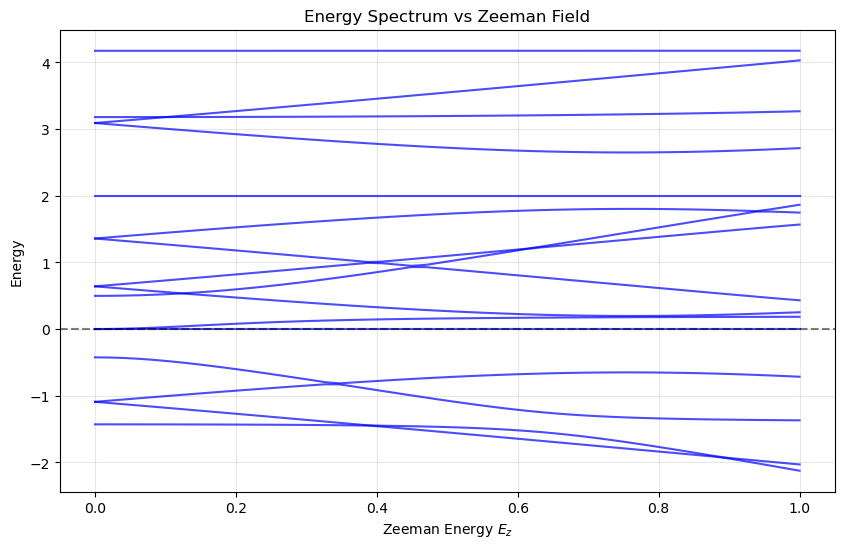

Minimum gap: 0.0028 at E_z = 0.388


In [12]:
# Sweep Zeeman field
E_z_values = np.linspace(0, 1.0, 50)
spectrum = []

for Ez in E_z_values:
    params_sweep = parameters.copy()
    params_sweep['E_z'] = Ez
    H_Ez = H_function(**params_sweep)
    eigenvals = np.linalg.eigvals(H_Ez)
    spectrum.append(np.sort(eigenvals))

spectrum = np.array(spectrum)

# Plot the energy spectrum
plt.figure(figsize=(10, 6))
for i in range(len(eigenvalues)):
    plt.plot(E_z_values, spectrum[:, i], 'b-', alpha=0.7)

plt.xlabel('Zeeman Energy $E_z$')
plt.ylabel('Energy')
plt.title('Energy Spectrum vs Zeeman Field')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.show()

# Find potential topological phase transitions
gap_values = spectrum[:, 1] - spectrum[:, 0]
min_gap_idx = np.argmin(gap_values)
print(f"Minimum gap: {gap_values[min_gap_idx]:.4f} at E_z = {E_z_values[min_gap_idx]:.3f}")

#### Summary

This tutorial demonstrated the key features of the `second_quantization` package:

1. **Symbolic operator algebra**: We used SymPy's fermionic operators to construct a complex many-body Hamiltonian symbolically.

2. **Automatic matrix conversion**: The package automatically converted our symbolic expressions into numerical matrices suitable for computation.

3. **Parameter flexibility**: We can easily substitute different parameter values and study the system's behavior.

4. **Physical insights**: By analyzing the spectrum, we can identify interesting physics like potential topological phase transitions.

The poor man's Majorana model showcases how the package enables rapid exploration of quantum many-body systems, from symbolic construction to numerical analysis.